# Book Recommandation System

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

# Data Sets

In [2]:
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv") 
users = pd.read_csv("Users.csv")

C:\Users\ds_sa\AppData\Local\Temp\ipykernel_10272\1116786850.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


# Book Dataset

In [3]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [6]:
books.shape

(271360, 8)

In [7]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [8]:
books.isnull()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
271355,False,False,False,False,False,False,False,False
271356,False,False,False,False,False,False,False,False
271357,False,False,False,False,False,False,False,False
271358,False,False,False,False,False,False,False,False


In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
books.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Length: 271360, dtype: bool

In [11]:
books.duplicated().sum()

0

In [12]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

# Users Dataset

In [13]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [16]:
users.shape

(278858, 3)

In [17]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [18]:
users.isnull()

,User-ID,Location,Age
0,False,False,True
1,False,False,False
2,False,False,True
3,False,False,False
4,False,False,True
...,...,...,...
278853,False,False,True
278854,False,False,False
278855,False,False,True
278856,False,False,True


In [19]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [20]:
users.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Length: 278858, dtype: bool

In [21]:
users.duplicated().sum()

0

In [22]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

# Ratings Dataset

In [23]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [24]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [25]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [26]:
ratings.shape

(1149780, 3)

In [27]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [28]:
ratings.isnull()

,User-ID,ISBN,Book-Rating
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1149775,False,False,False
1149776,False,False,False
1149777,False,False,False
1149778,False,False,False


In [29]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [30]:
ratings.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Length: 1149780, dtype: bool

In [31]:
ratings.duplicated().sum()

0

In [32]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

#  Exploratory Data Analysis

In [33]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [34]:
print( books['Book-Author'].value_counts().head(10))

Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 Authors')

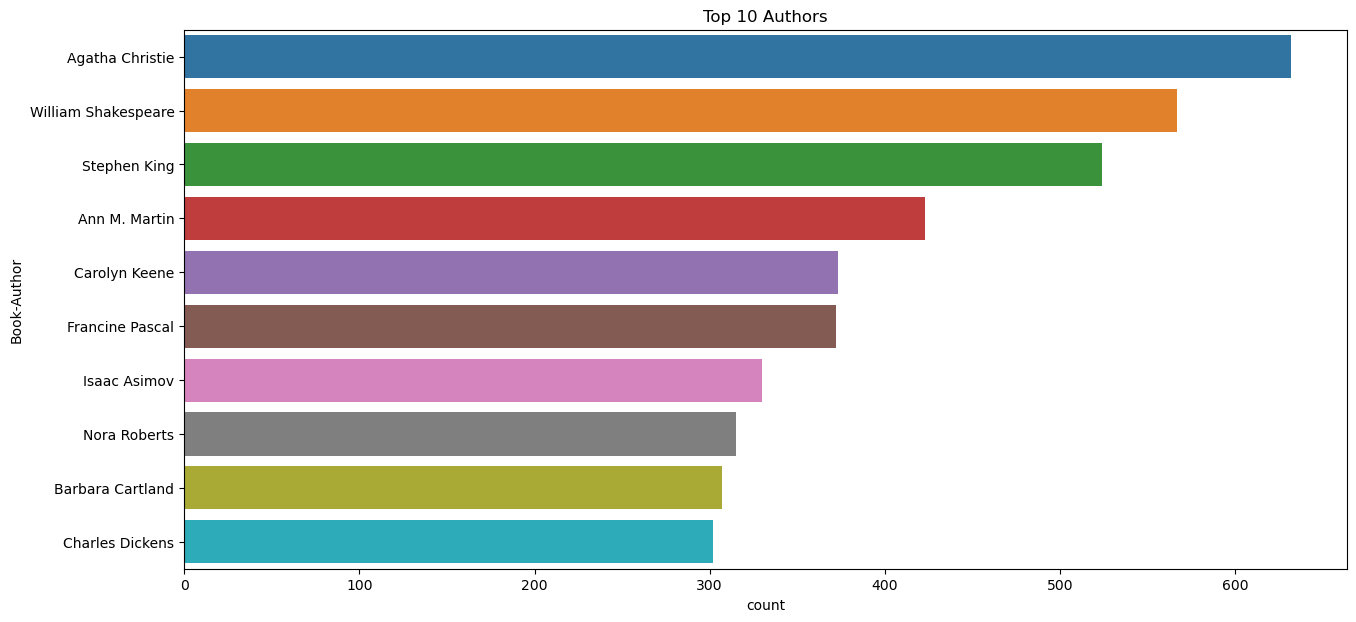

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

In [36]:
print( books['Publisher'].value_counts().head(10))

Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 Publishers')

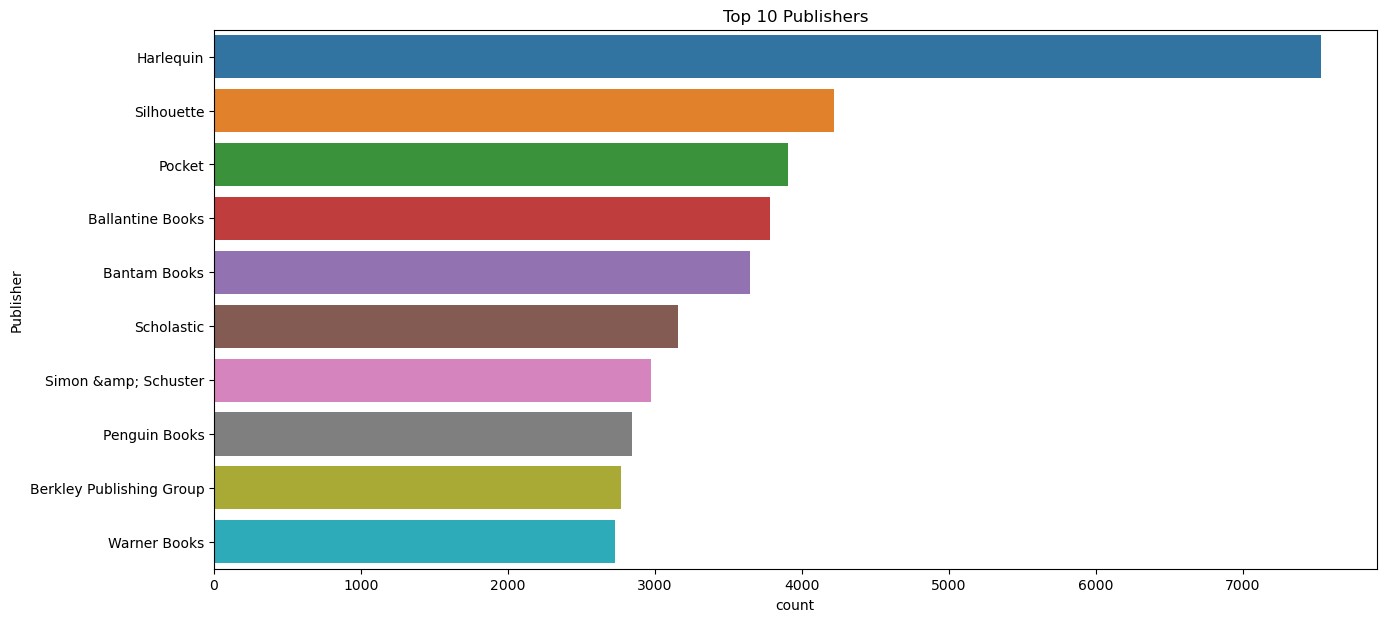

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [38]:
print( books['Book-Title'].value_counts().head(10))

Book-Title
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Dracula                           20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 Book-Titles')

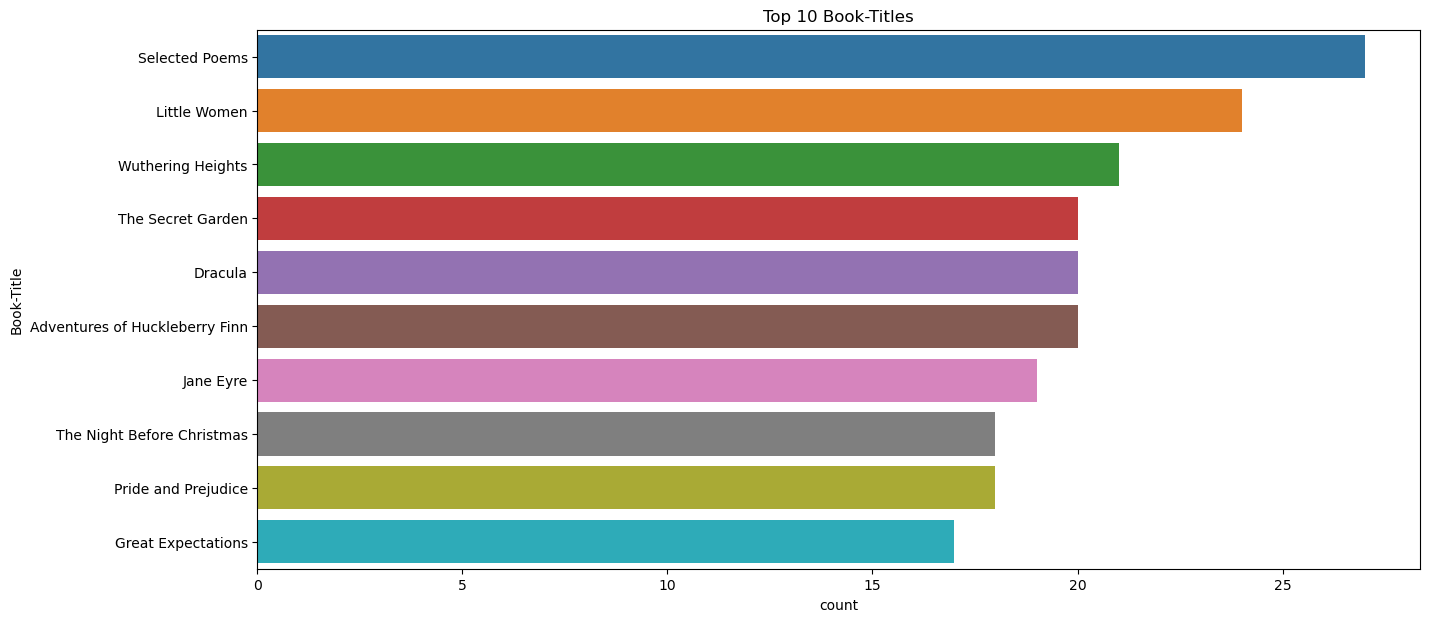

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Title',data=books,order=pd.value_counts(books['Book-Title']).iloc[:10].index)
plt.title('Top 10 Book-Titles')

In [40]:
print( books['ISBN'].value_counts().head(10))

ISBN
0195153448    1
0746008481    1
0395219906    1
043916169X    1
0879235322    1
077108482X    1
0207124310    1
0439172543    1
0590408518    1
0902375512    1
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 ISBN')

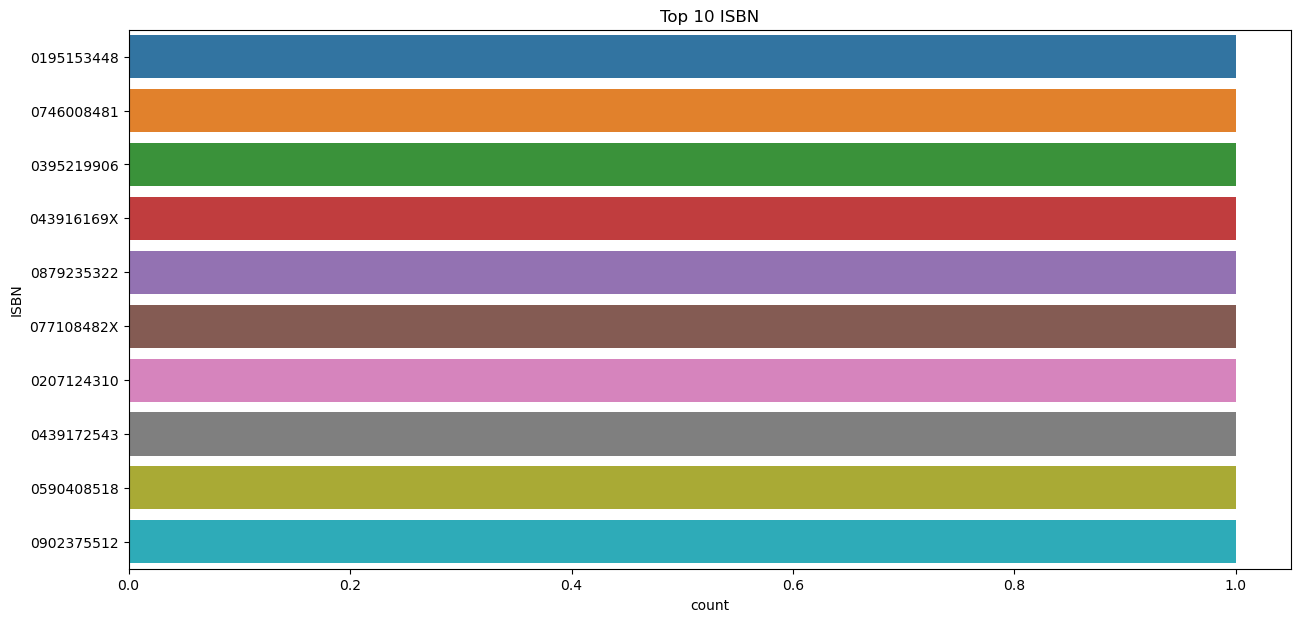

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(y='ISBN',data=books,order=pd.value_counts(books['ISBN']).iloc[:10].index)
plt.title('Top 10 ISBN')

In [42]:
print( books['Year-Of-Publication'].value_counts().head(10))

Year-Of-Publication
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
2003    11610
1997    11494
1996    10687
1995    10259
1994     8857
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 Year-Of-Publications')

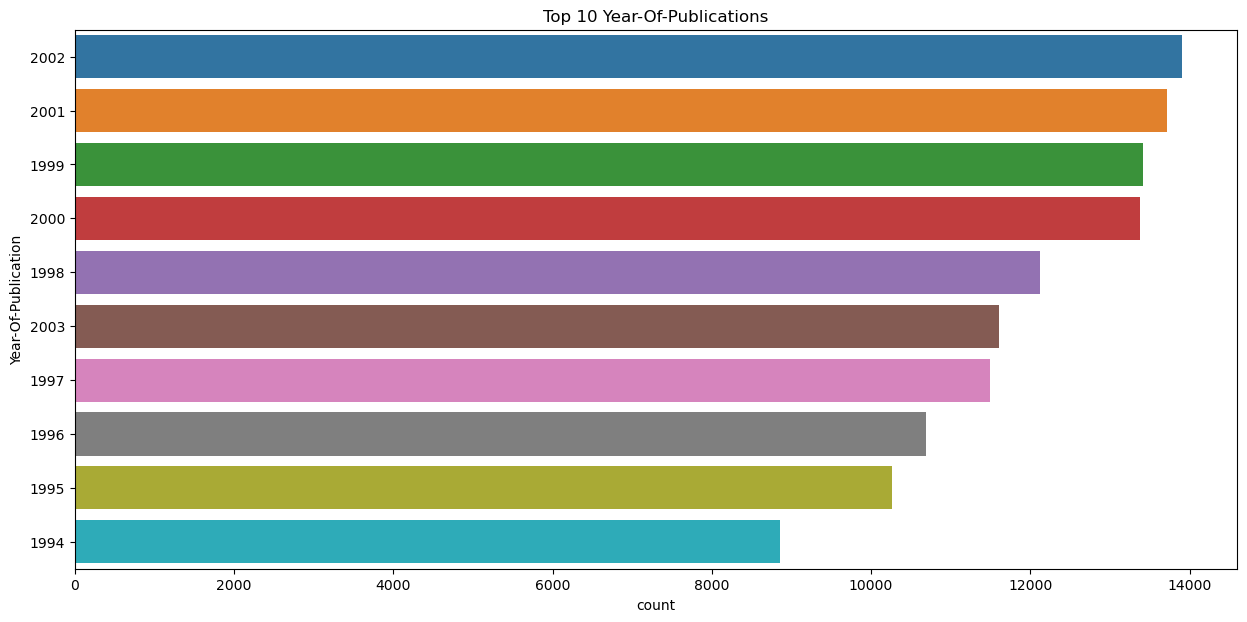

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(y='Year-Of-Publication',data=books,order=pd.value_counts(books['Year-Of-Publication']).iloc[:10].index)
plt.title('Top 10 Year-Of-Publications')

In [44]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)] # filter isin
ratings_new

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [45]:
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]


In [46]:
merged_data1 = pd.merge(books, ratings_new, on='ISBN')
merged_data = pd.merge(merged_data1, users, on='User-ID')
merged_data =  merged_data.sort_values('ISBN', ascending=True)
merged_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
307558,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,171118,8,"toronto, ontario, canada",47.0
454163,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,209516,0,"felixstowe, suffolk, united kingdom",57.0
256671,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,86123,0,"peterborough, ontario, canada",NaN
210337,0001046438,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,23902,9,"london, england, united kingdom",NaN
827421,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,196149,0,"lisburn, northern ireland, united kingdom",29.0


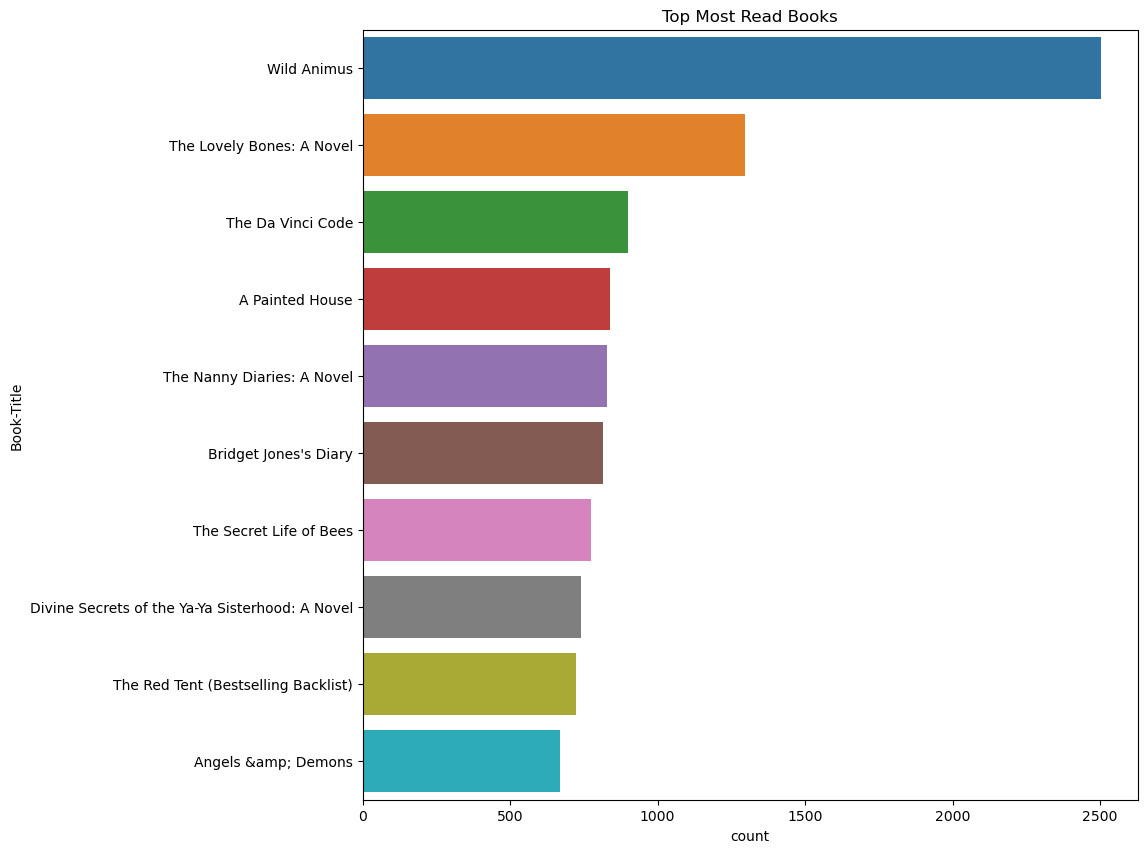

In [47]:
most_read = merged_data['Book-Title'].value_counts().reset_index()
most_read.columns = ['Book-Title','count']

plt.figure(figsize = (10,10))
plt.title("Top Most Read Books")
sns.barplot(x = 'count', y = 'Book-Title', data = most_read.head(10));

In [48]:
print(ratings_new.columns)
print(users.columns)


Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')


In [49]:
top_rated = merged_data[['Book-Title','Book-Rating']]
top_rated = top_rated.groupby('Book-Title', as_index=False)['Book-Rating'].mean()
top_rated = top_rated.sort_values('Book-Rating',ascending=False).reset_index()
top_rated = top_rated[['Book-Title','Book-Rating']]

top_rated.head()

,Book-Title,Book-Rating
0,Film Is: The International Free Cinema,10.0
1,More Secrets of Happy Children: Embrace Your P...,10.0
2,Jo's Boys : From the Original Publisher,10.0
3,The Vanished Priestess : An Annie Szabo Mystery,10.0
4,Game and Hunting,10.0


In [50]:
top_rated.tail()

,Book-Title,Book-Rating
241066,Invaders of the Planet Earth (Choose Your Own ...,0.0
241067,Sammy Discovers the Alphabet (Learn-With-Sammy),0.0
241068,Sammy Carducci's Guide to Women,0.0
241069,Sammle mir Kiesel am FluÃ?Â?. Mehr als eine Li...,0.0
241070,TRAVELLING MAN,0.0


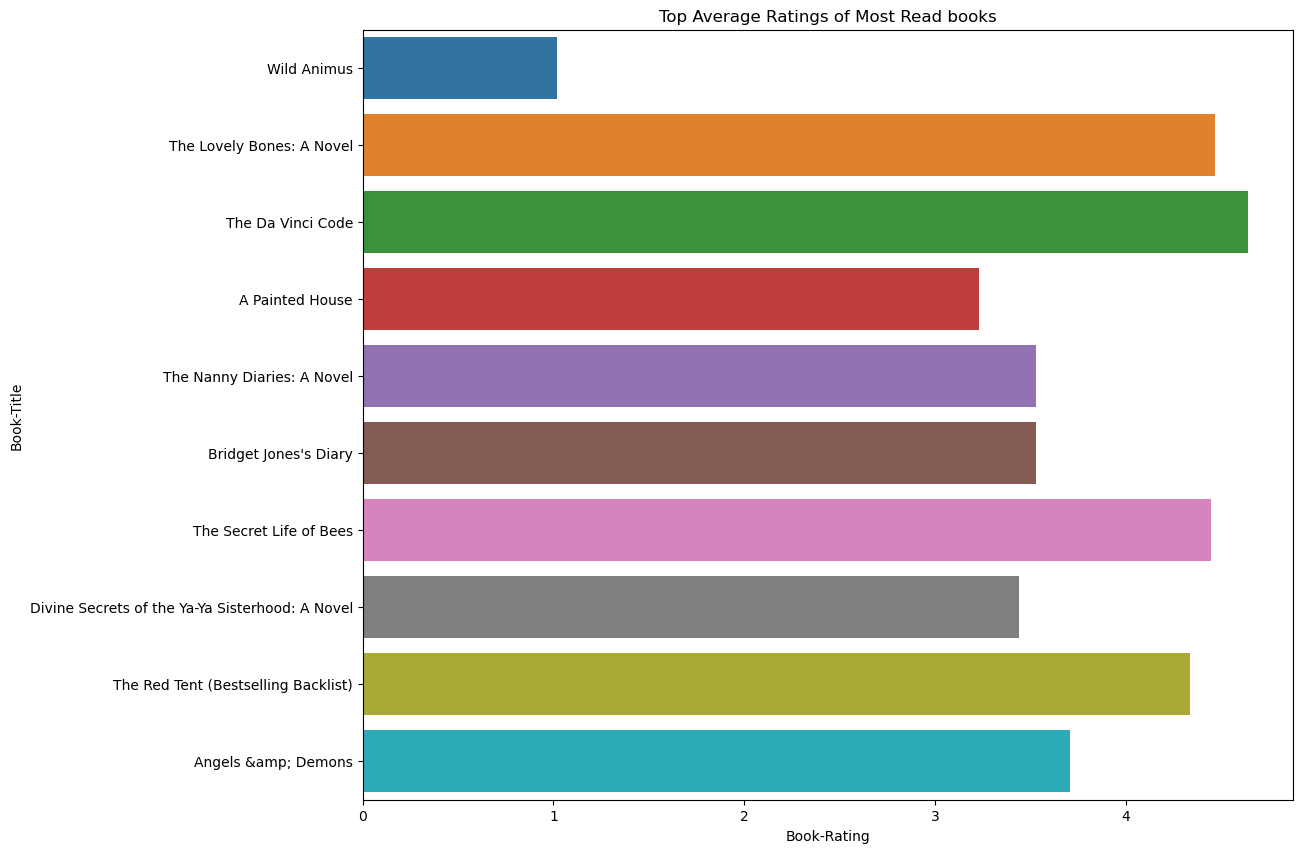

In [51]:
# Calculate Average Ratings
avg_data = merged_data.groupby('Book-Title', as_index=False)['Book-Rating'].mean()

# Count the Number of Reads for Each Book
temp = merged_data['Book-Title'].value_counts().reset_index()
temp.columns = ['Book-Title','count']

 # Merge Average Ratings with Read Counts
most_rated_by_reads = pd.merge(avg_data,temp,on='Book-Title')
most_rated_by_reads = most_rated_by_reads.sort_values('count',ascending=False)

# Plotting the Bar Plot
plt.figure(figsize=(12,10))
plt.title("Top Average Ratings of Most Read books")
sns.barplot(x = 'Book-Rating', y = 'Book-Title', data = most_rated_by_reads.head(10));

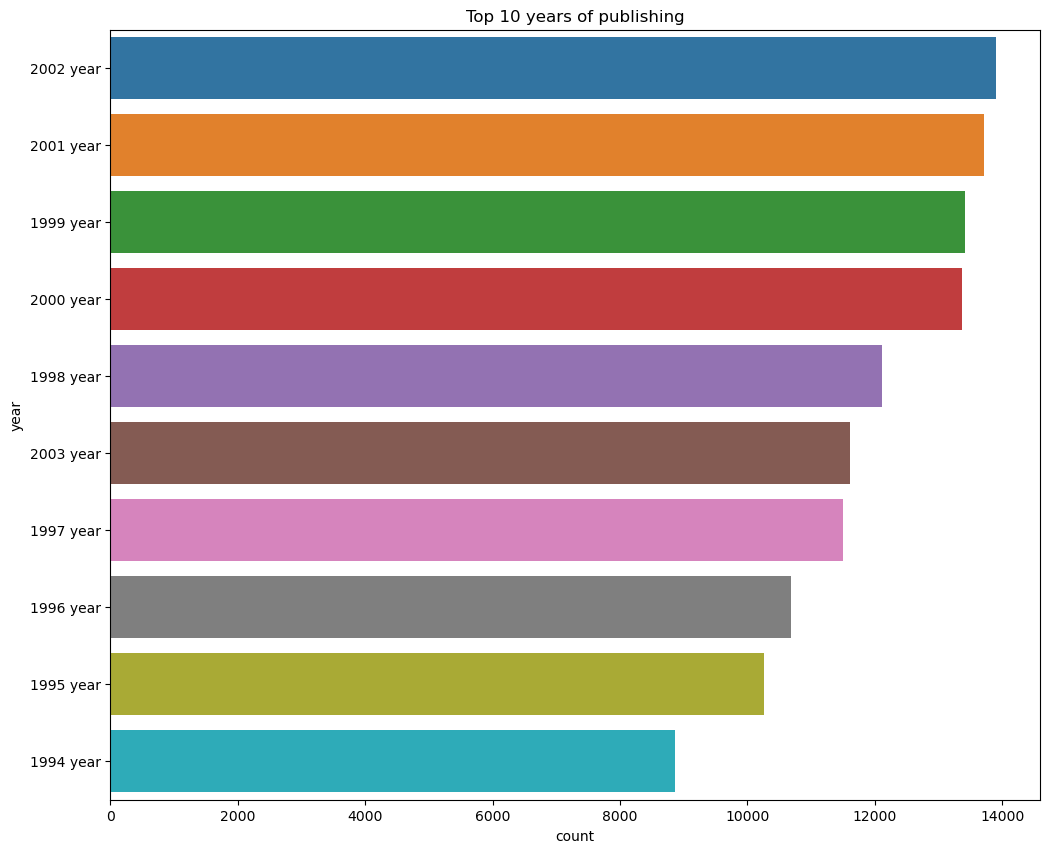

In [52]:
# Count the Number of Books for Each Publication Year
yearOP = books['Year-Of-Publication'].value_counts().reset_index()

# Rename Columns
yearOP.columns = ['value', 'count']

# Create a 'year' Column
yearOP['year'] = yearOP['value'].astype(str) + ' year'
yearOP = yearOP.sort_values('count',ascending=False)

# Plotting the Bar Plot
plt.figure(figsize=(12,10))
plt.title('Top 10 years of publishing')
sns.barplot(data = yearOP.head(10), x='count', y="year");

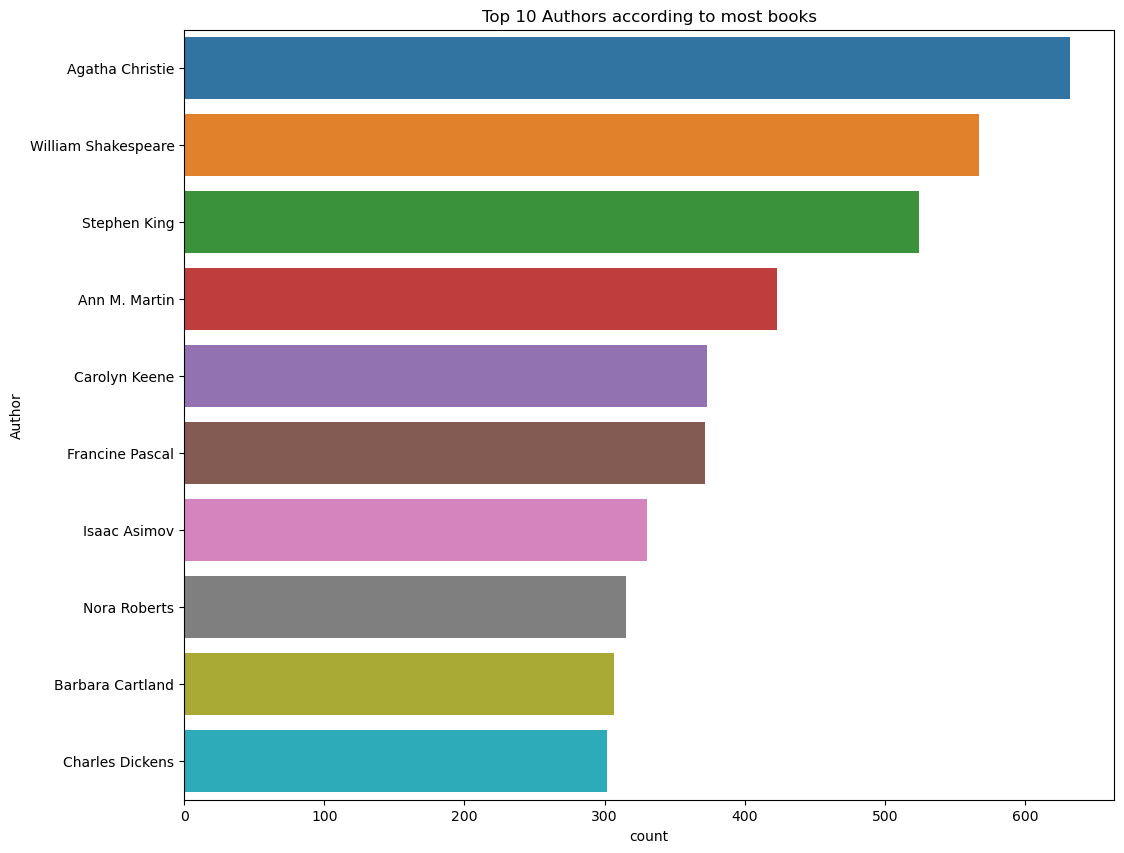

In [53]:
# Count the Number of Books for Each Author
top_author = books['Book-Author'].value_counts().reset_index()
# Rename Columns
top_author.columns = ['Author', 'count']
top_author['Author'] = top_author['Author']
top_author = top_author.sort_values('count',ascending=False)

# Plotting the Bar Plot
plt.figure(figsize=(12,10))
plt.title('Top 10 Authors according to most books')
sns.barplot(data = top_author.head(10), x = 'count', y = 'Author');

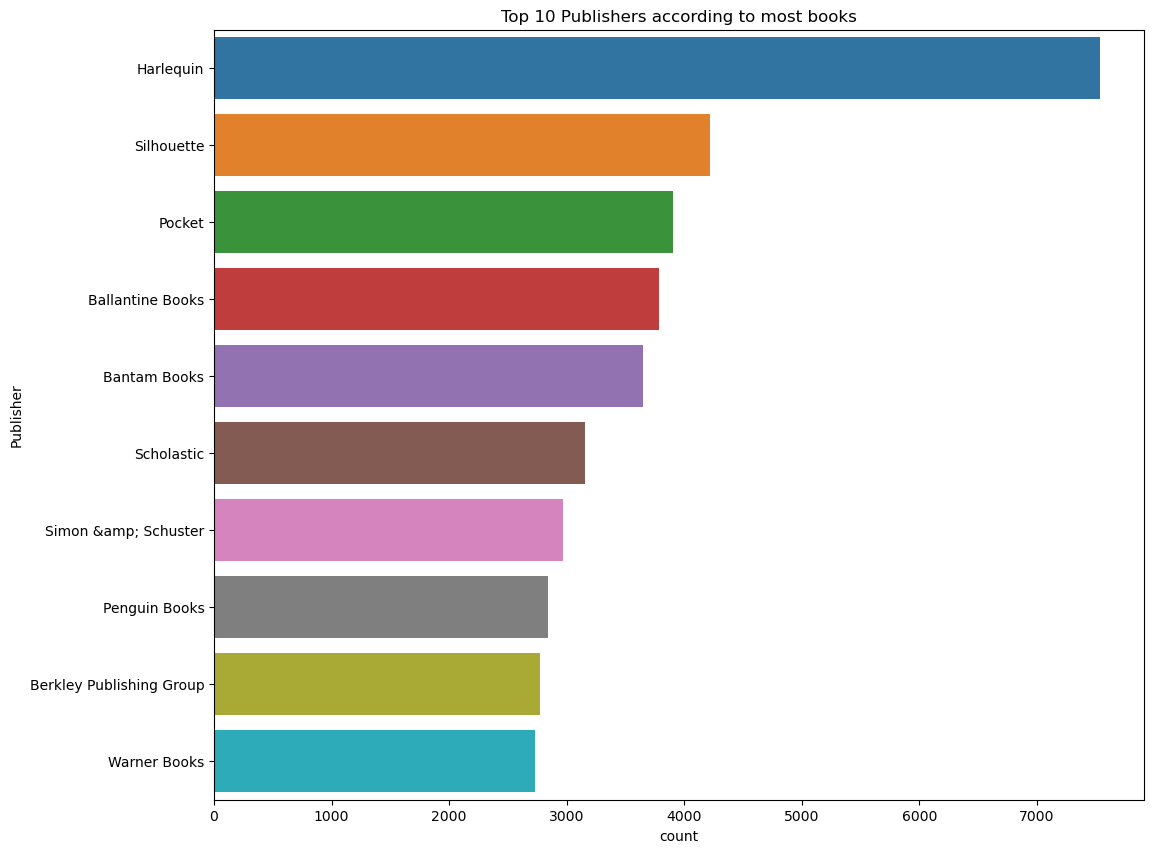

In [54]:
# Count the Number of Books for Each Publisher
top_publisher = books['Publisher'].value_counts().reset_index()

# Rename Columns
top_publisher.columns = ['Publisher', 'count']
top_publisher['Publisher'] = top_publisher['Publisher']
top_publisher = top_publisher.sort_values('count',ascending=False)

# Plotting the Bar Plot
plt.figure(figsize=(12,10))
plt.title('Top 10 Publishers according to most books')
sns.barplot(data = top_publisher.head(10), x = 'count', y = 'Publisher');

In [55]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [56]:
# Split 'location' column into three columns: 'city', 'state', 'country'
user_location_expanded = users['Location'].str.split(',', n=2, expand=True)

# Rename the resulting split columns
user_location_expanded.columns = ['city', 'state', 'country']

# Join the split columns back to the original DataFrame 'users'
users = users.join(user_location_expanded)


In [57]:
user_location_expanded

,city,state,country
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,yukon territory,russia
3,porto,v.n.gaia,portugal
4,farnborough,hants,united kingdom
...,...,...,...
278853,portland,oregon,usa
278854,tacoma,washington,united kingdom
278855,brampton,ontario,canada
278856,knoxville,tennessee,usa


In [58]:
users

,User-ID,Location,Age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa


Text(0.5, 1.0, 'No of readers from each country (Top 5)')

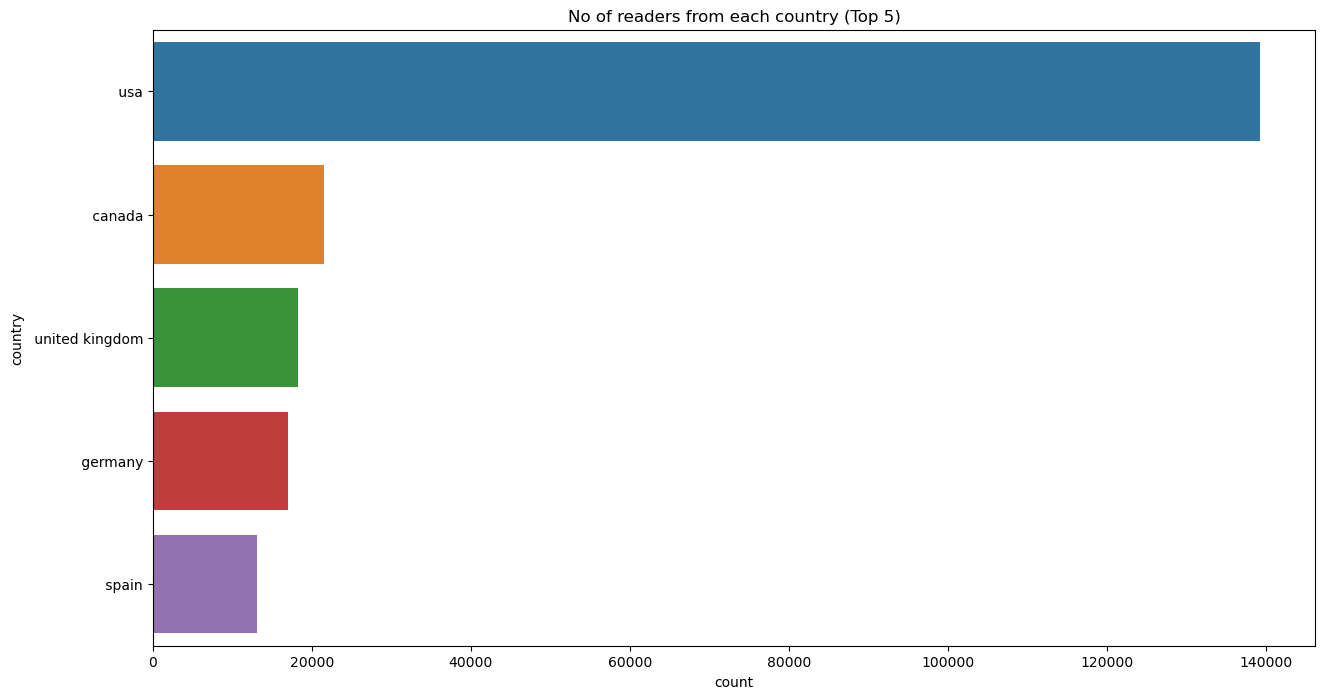

In [59]:
plt.figure(figsize=(15,8))
sns.countplot(y="country", data=users, order=users['country'].value_counts().index[0:5])
plt.title("No of readers from each country (Top 5)")

Text(0.5, 1.0, 'No of readers from states of USA (Top 10)')

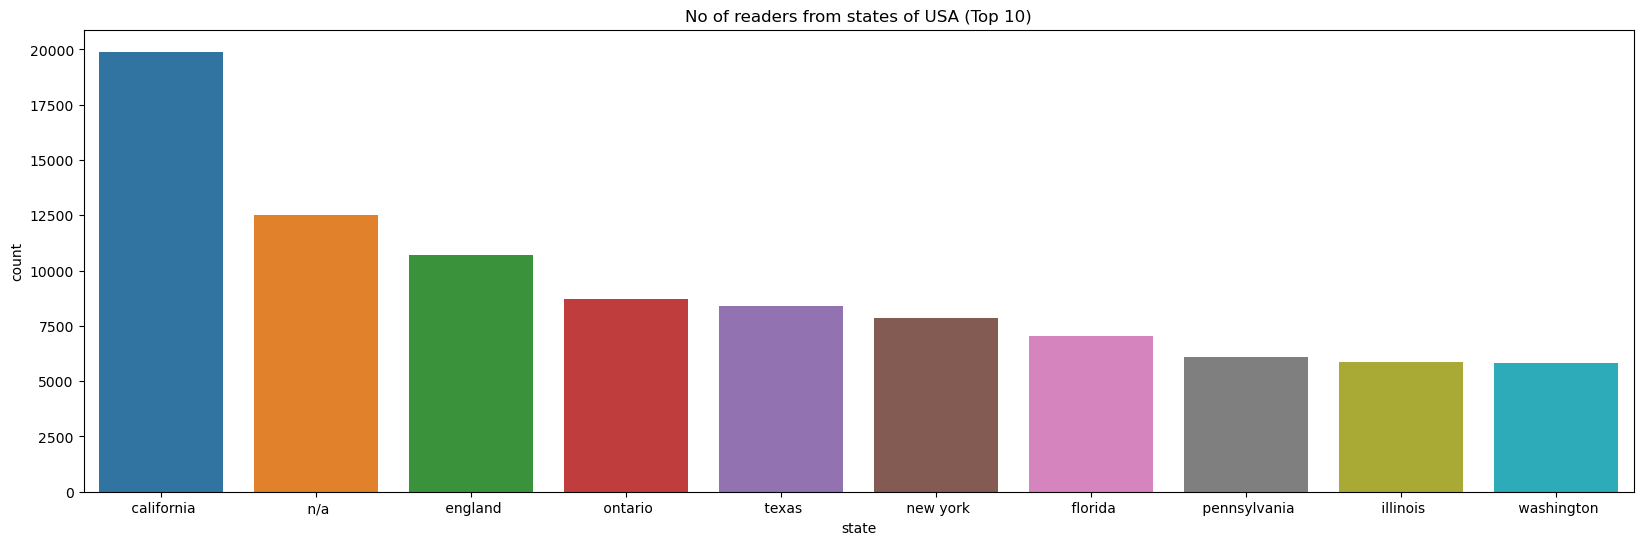

In [60]:
data=users[users['country']=='usa']
plt.figure(figsize=(20,6))
sns.countplot(x="state", data=users,order=users['state'].value_counts().index[0:10])
plt.title("No of readers from states of USA (Top 10)")

In [61]:
print( users['User-ID'].value_counts().head(10))

User-ID
1         1
185904    1
185910    1
185909    1
185908    1
185907    1
185906    1
185905    1
185903    1
185725    1
Name: count, dtype: int64


Text(0.5, 1.0, "Top 10 User-ID'S")

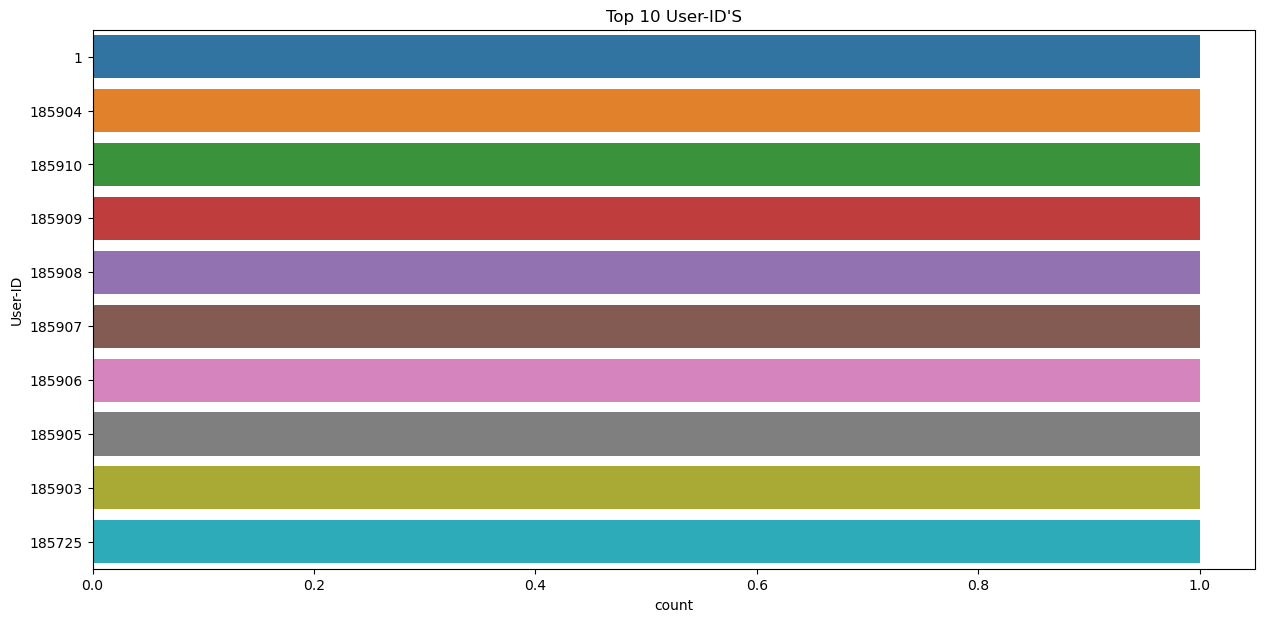

In [62]:
plt.figure(figsize=(15,7))
sns.countplot(y='User-ID',data=users,order=pd.value_counts(users['User-ID']).iloc[:10].index)
plt.title('''Top 10 User-ID'S''')

In [63]:
print( users['Location'].value_counts().head(10))

Location
london, england, united kingdom        2506
toronto, ontario, canada               2250
sydney, new south wales, australia     1744
melbourne, victoria, australia         1708
portland, oregon, usa                  1629
chicago, illinois, usa                 1526
seattle, washington, usa               1484
new york, new york, usa                1411
madrid, madrid, spain                  1400
vancouver, british columbia, canada    1359
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 Locations')

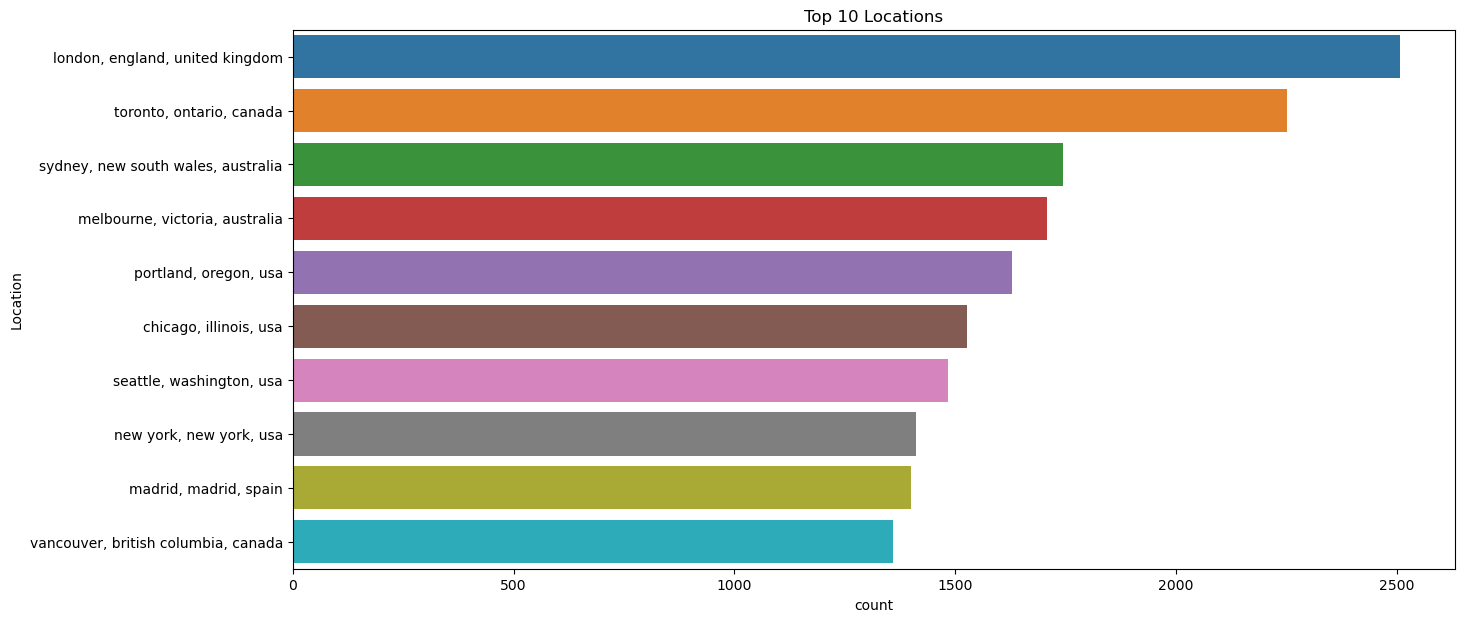

In [64]:
plt.figure(figsize=(15,7))
sns.countplot(y='Location',data=users,order=pd.value_counts(users['Location']).iloc[:10].index)
plt.title('Top 10 Locations')

In [65]:
print( users['country'].value_counts().head(10))

country
 usa               139183
 canada             21556
 united kingdom     18286
 germany            17021
 spain              13088
 australia          11719
 italy              11238
                     4561
 france              3440
 portugal            3305
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 countrys')

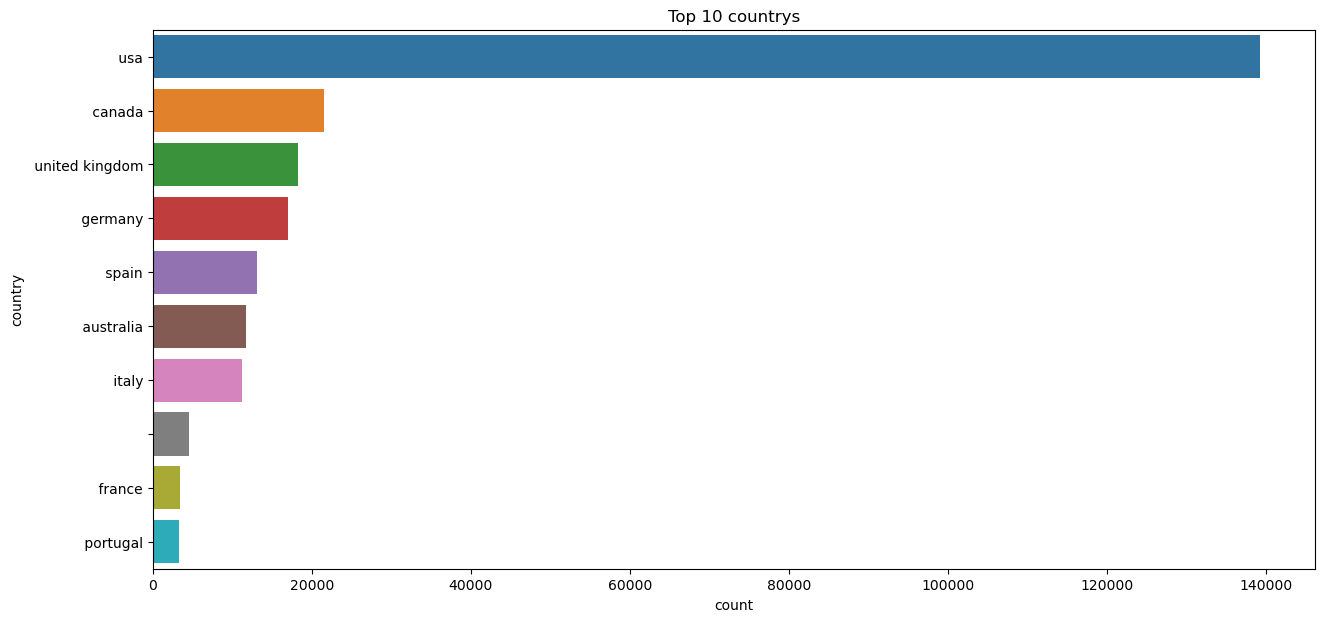

In [66]:
plt.figure(figsize=(15,7))
sns.countplot(y='country',data=users,order=pd.value_counts(users['country']).iloc[:10].index)
plt.title('Top 10 countrys')

In [67]:
print( users['state'].value_counts().head(10))

state
 california      19898
 n/a             12527
 england         10691
 ontario          8736
 texas            8392
 new york         7874
 florida          7025
 pennsylvania     6084
 illinois         5874
 washington       5824
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 states')

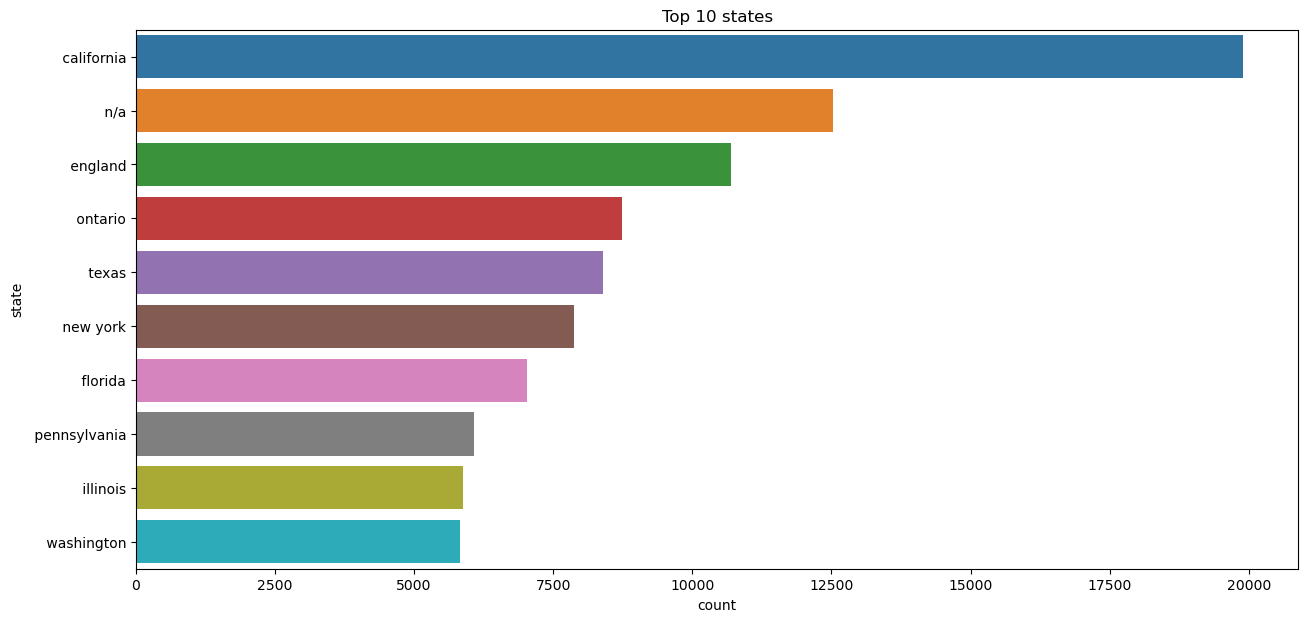

In [68]:
plt.figure(figsize=(15,7))
sns.countplot(y='state',data=users,order=pd.value_counts(users['state']).iloc[:10].index)
plt.title('Top 10 states')

In [69]:
print( users['city'].value_counts().head(10))

city
london       4105
barcelona    2664
toronto      2342
madrid       1933
sydney       1884
portland     1869
melbourne    1863
vancouver    1699
chicago      1566
seattle      1541
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 cities')

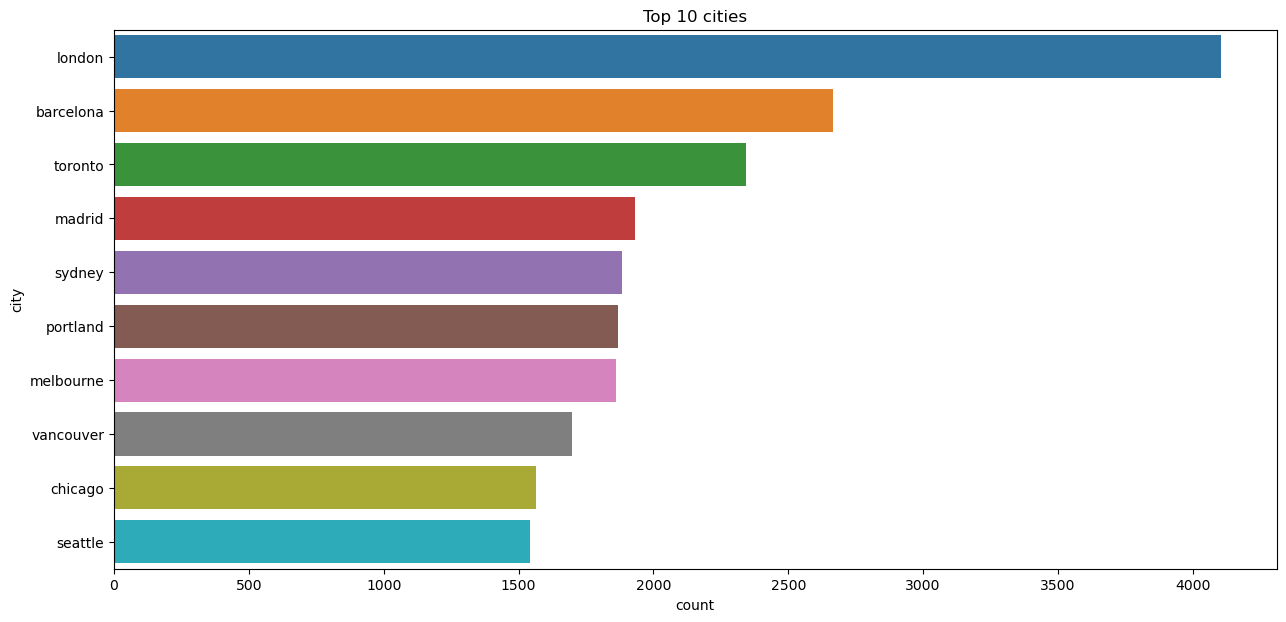

In [70]:
plt.figure(figsize=(15,7))
sns.countplot(y='city',data=users,order=pd.value_counts(users['city']).iloc[:10].index)
plt.title('Top 10 cities')

In [71]:
print( users['Age'].value_counts().head(10))

Age
24.0    5687
25.0    5618
26.0    5547
23.0    5456
27.0    5383
28.0    5347
29.0    5293
32.0    4781
30.0    4778
22.0    4714
Name: count, dtype: int64


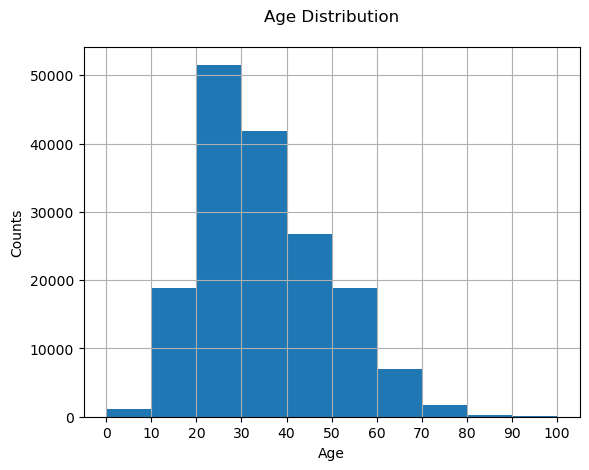

In [72]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.xticks(range(0,110,10))
plt.show()


Text(0.5, 1.0, 'Find outlier data in Age column')

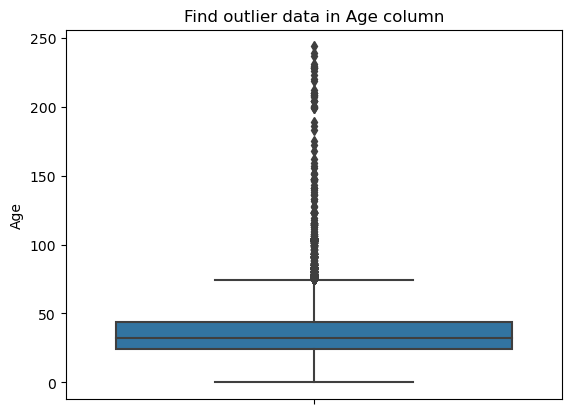

In [73]:
sns.boxplot(y='Age', data=users)
plt.title('Find outlier data in Age column')

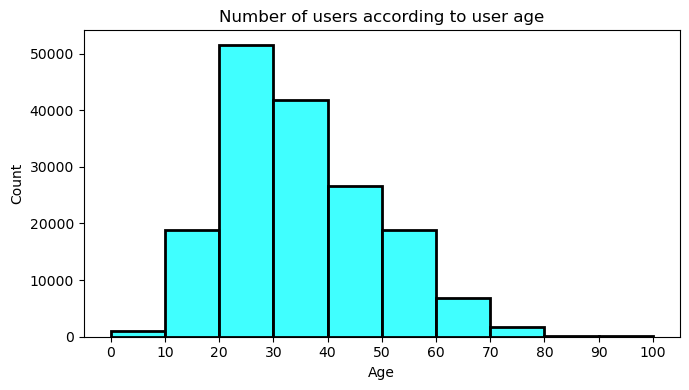

In [74]:
plt.figure(figsize=(7,4), tight_layout=True)
plt.title('Number of users according to user age')
sns.histplot(users.Age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], linewidth=2, color='cyan', edgecolor='black')
plt.xticks(range(0,110,10))
plt.show()


C:\Users\ds_sa\AppData\Local\Temp\ipykernel_10272\4261619993.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.Age)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Age Distribution Plot')

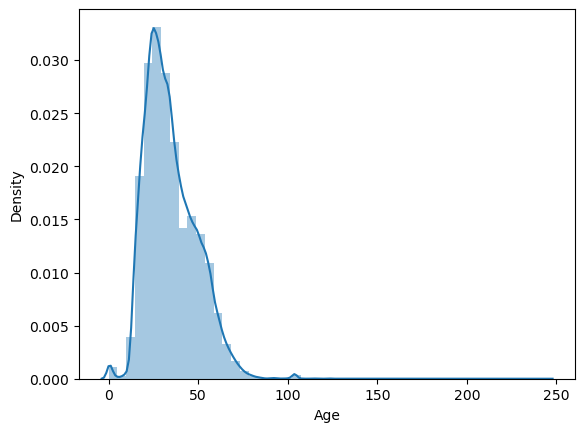

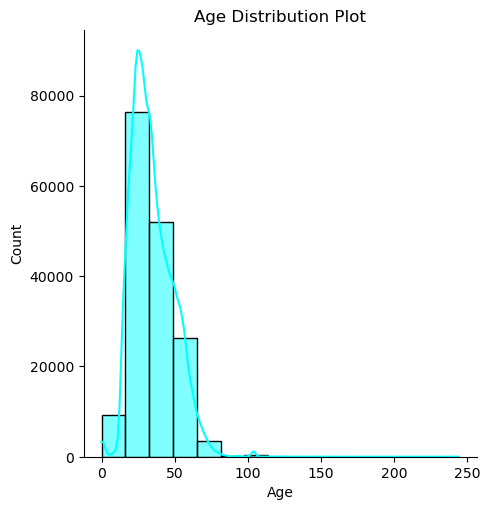

In [75]:
sns.distplot(users.Age)
sns.displot(users.Age, bins=15, kde=True, color='cyan', edgecolor='black')
plt.title('Age Distribution Plot')


# Plotting the histogram with displot



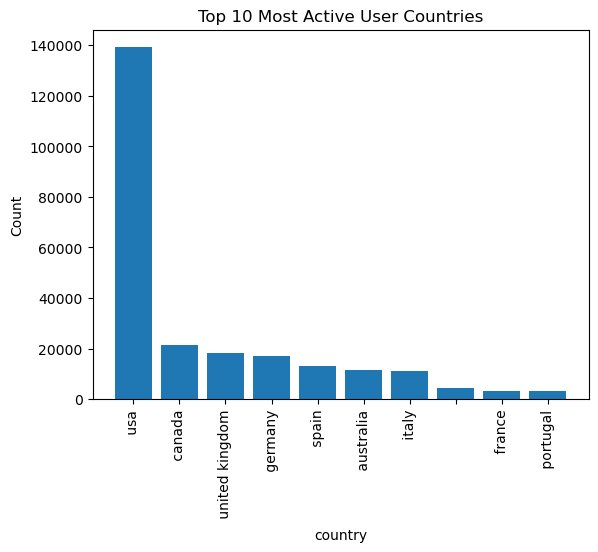

In [76]:
#Bar Plot of Top 10 Most Active User countries
top_user_countries = users['country'].value_counts().head(10)
plt.bar(top_user_countries.index,top_user_countries.values)
plt.xticks(rotation = 90)
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Top 10 Most Active User Countries')
plt.show()

In [77]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [78]:
print( ratings['User-ID'].value_counts().head(10))

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64


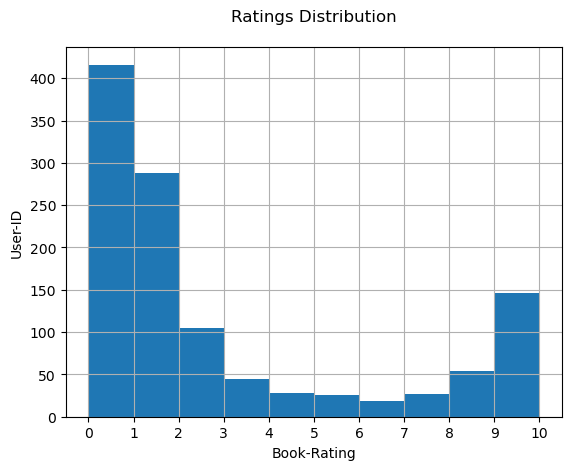

In [79]:
users.Age.hist(bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.title('Ratings Distribution\n')
plt.ylabel('User-ID')
plt.xlabel('Book-Rating')
plt.xticks(range(0,11,1))
plt.show()


In [80]:
print( ratings['Book-Rating'].value_counts().head(10))

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
Name: count, dtype: int64


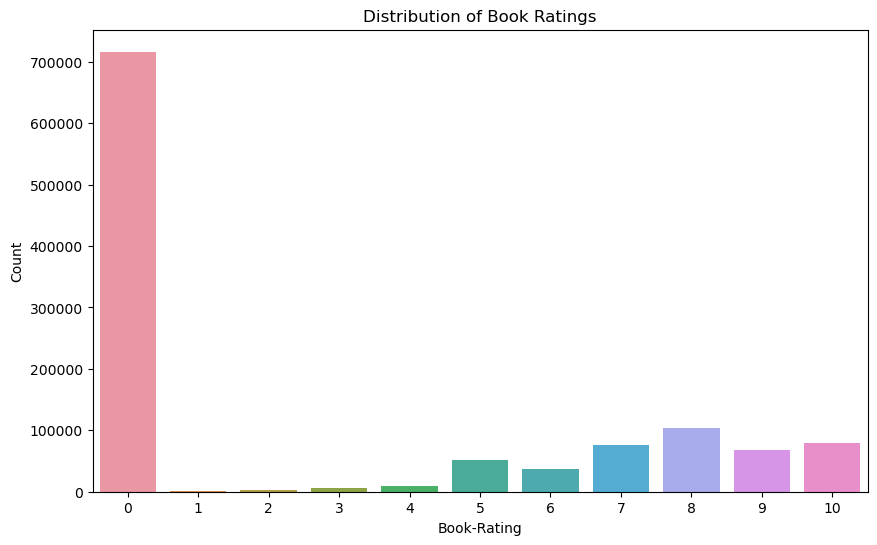

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book-Rating')
plt.ylabel('Count')
plt.show()


# Model - Building

# Recommandations

# Collaborative Filtering Based Recommander System

In [82]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [83]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [84]:
ratings.merge(books,on='ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [85]:
ratings.merge(books,on='ISBN').shape

(1031136, 10)

In [86]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [87]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [88]:
ratings_with_name.groupby('Book-Title').count()

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Title,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,4,4,4,4,4,4,4,4
Always Have Popsicles,1,1,1,1,1,1,1,1,1
Apple Magic (The Collector's series),1,1,1,1,1,1,1,1,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,1,1,1,1,1,1,1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ã?Â?lpiraten.,2,2,2,2,2,2,2,2,2
Ã?Â?rger mit Produkt X. Roman.,4,4,4,4,4,4,4,4,4
Ã?Â?sterlich leben.,1,1,1,1,1,1,1,1,1


In [89]:
ratings_with_name.groupby('Book-Title').count()['Book-Rating']

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
                                                                                                             ..
Ã?Â?lpiraten.                                                                                                 2
Ã?Â?rger mit Produkt X. Roman.                                                                                4
Ã?Â?sterlich leben.                                                                          

In [90]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [91]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [92]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [93]:
popular_df=popular_df[popular_df['num_ratings']>=250]

In [94]:
popular_df

,Book-Title,num_ratings,avg_rating
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


In [95]:
popular_df=popular_df.sort_values('avg_rating',ascending=False)

In [96]:
popular_df.head(10)

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [97]:
popular_df.merge(books,on='Book-Title')

,Book-Title,num_ratings,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...,...
735,Isle of Dogs,288,2.000000,0399147659,Patricia Cornwell,2001,Putnam Berkley Audio,http://images.amazon.com/images/P/0399147659.0...,http://images.amazon.com/images/P/0399147659.0...,http://images.amazon.com/images/P/0399147659.0...
736,Isle of Dogs,288,2.000000,0425186768,Patricia Cornwell,2002,Berkley Pub Group,http://images.amazon.com/images/P/0425186768.0...,http://images.amazon.com/images/P/0425186768.0...,http://images.amazon.com/images/P/0425186768.0...
737,Isle of Dogs,288,2.000000,0739420704,Patricia Cornwell,2001,G. P. Putnam's Sons,http://images.amazon.com/images/P/0739420704.0...,http://images.amazon.com/images/P/0739420704.0...,http://images.amazon.com/images/P/0739420704.0...
738,Isle of Dogs,288,2.000000,B0000C7BNG,Patricia Daniels Cornwell,2001,Putnam Pub Group,http://images.amazon.com/images/P/B0000C7BNG.0...,http://images.amazon.com/images/P/B0000C7BNG.0...,http://images.amazon.com/images/P/B0000C7BNG.0...


In [98]:
popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')

,Book-Title,num_ratings,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
...,...,...,...,...,...,...,...,...,...,...
716,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283,0380730138,A. Manette Ansay,1998,Perennial,http://images.amazon.com/images/P/0380730138.0...,http://images.amazon.com/images/P/0380730138.0...,http://images.amazon.com/images/P/0380730138.0...
717,Whispers,286,2.199301,0440216745,BELVA PLAIN,1994,Dell,http://images.amazon.com/images/P/0440216745.0...,http://images.amazon.com/images/P/0440216745.0...,http://images.amazon.com/images/P/0440216745.0...
727,Presumed Innocent,294,2.139456,0446359866,Scott Turow,1989,Warner Books,http://images.amazon.com/images/P/0446359866.0...,http://images.amazon.com/images/P/0446359866.0...,http://images.amazon.com/images/P/0446359866.0...
733,Isle of Dogs,288,2.000000,0425182908,Patricia Cornwell,2002,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...


In [99]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [100]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [101]:
x = ratings_with_name.groupby('User-ID')

In [102]:
x

In [103]:
x.count()

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
User-ID,,,,,,,,,
2,1,1,1,1,1,1,1,1,1
8,17,17,17,17,17,17,17,17,17
9,3,3,3,3,3,3,3,3,3
10,1,1,1,1,1,1,1,1,1
12,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
278846,1,1,1,1,1,1,1,1,1
278849,4,4,4,4,4,4,4,4,4
278851,23,23,23,23,23,23,23,23,23


In [104]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [105]:
padhe_likhe_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [106]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [107]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [108]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [109]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [110]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [111]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [112]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [113]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [114]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [115]:
pt.fillna(0,inplace=True)

In [116]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
from sklearn.metrics.pairwise import cosine_similarity

In [118]:
similarity_scores = cosine_similarity(pt) #Euclidean Distance

In [119]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [120]:
similarity_scores[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

# item-based collaborative system

In [121]:
def recommend(book_name):
    return 

In [122]:
np.where(pt.index=='1984')[0][0]

0

In [123]:
np.where(pt.index=='Zoya')[0][0]

704

In [124]:
enumerate(similarity_scores[0])

In [125]:
list(enumerate(similarity_scores[0]))

[(0, 0.9999999999999999),
 (1, 0.10255024829874465),
 (2, 0.012208555646509366),
 (3, 0.0),
 (4, 0.053672244225442485),
 (5, 0.027749013024662858),
 (6, 0.08216491130000354),
 (7, 0.13732869060263378),
 (8, 0.03261686350494277),
 (9, 0.03667590746512177),
 (10, 0.02322418425912186),
 (11, 0.06766486753662343),
 (12, 0.020839782065795794),
 (13, 0.09673734976610586),
 (14, 0.13388864701187034),
 (15, 0.08303111691811028),
 (16, 0.1115354275858341),
 (17, 0.05100410510067514),
 (18, 0.025177841632809915),
 (19, 0.11706383185253948),
 (20, 0.0),
 (21, 0.14333792815336935),
 (22, 0.07847534327232125),
 (23, 0.06150451339525138),
 (24, 0.08723968326958673),
 (25, 0.0),
 (26, 0.07009814362931202),
 (27, 0.13658680855472938),
 (28, 0.07600327535501016),
 (29, 0.12167133598776536),
 (30, 0.007680459111722776),
 (31, 0.01473221255132234),
 (32, 0.0),
 (33, 0.07965814289647455),
 (34, 0.04522616573040869),
 (35, 0.01556270914112474),
 (36, 0.09495937740802214),
 (37, 0.018230696811058135),
 (38,

In [126]:
sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1])

[(3, 0.0),
 (20, 0.0),
 (25, 0.0),
 (32, 0.0),
 (52, 0.0),
 (55, 0.0),
 (61, 0.0),
 (67, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (83, 0.0),
 (91, 0.0),
 (99, 0.0),
 (105, 0.0),
 (115, 0.0),
 (132, 0.0),
 (133, 0.0),
 (134, 0.0),
 (138, 0.0),
 (142, 0.0),
 (143, 0.0),
 (146, 0.0),
 (157, 0.0),
 (161, 0.0),
 (173, 0.0),
 (176, 0.0),
 (179, 0.0),
 (191, 0.0),
 (201, 0.0),
 (210, 0.0),
 (222, 0.0),
 (223, 0.0),
 (237, 0.0),
 (246, 0.0),
 (248, 0.0),
 (263, 0.0),
 (266, 0.0),
 (273, 0.0),
 (274, 0.0),
 (287, 0.0),
 (290, 0.0),
 (308, 0.0),
 (311, 0.0),
 (315, 0.0),
 (335, 0.0),
 (336, 0.0),
 (340, 0.0),
 (351, 0.0),
 (356, 0.0),
 (367, 0.0),
 (375, 0.0),
 (378, 0.0),
 (388, 0.0),
 (390, 0.0),
 (391, 0.0),
 (399, 0.0),
 (403, 0.0),
 (405, 0.0),
 (408, 0.0),
 (428, 0.0),
 (433, 0.0),
 (449, 0.0),
 (451, 0.0),
 (452, 0.0),
 (455, 0.0),
 (456, 0.0),
 (468, 0.0),
 (471, 0.0),
 (473, 0.0),
 (477, 0.0),
 (480, 0.0),
 (492, 0.0),
 (493, 0.0),
 (498, 0.0),
 (519, 0.0),
 (523, 0.0),
 (526, 0.0),
 

In [127]:
sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1], reverse=True)

[(0, 0.9999999999999999),
 (47, 0.2702651417103732),
 (545, 0.26396193711234966),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286),
 (181, 0.22222254415660225),
 (500, 0.21057743765309012),
 (344, 0.20675540390453995),
 (554, 0.20025063706783053),
 (520, 0.19972624710300058),
 (527, 0.19656287691544358),
 (488, 0.19511819825564608),
 (552, 0.1920889620576415),
 (318, 0.19182230688281934),
 (624, 0.18925313707609975),
 (598, 0.18921367782346202),
 (60, 0.18908176672188648),
 (622, 0.18571699439818884),
 (647, 0.1841081817659337),
 (546, 0.18408910419891056),
 (202, 0.18049207281616433),
 (541, 0.17990898085771034),
 (309, 0.17415730924332484),
 (588, 0.1738182944100774),
 (537, 0.1700871998622835),
 (544, 0.1672877700938274),
 (66, 0.16566734565340116),
 (118, 0.165272766123669),
 (269, 0.1650329228149958),
 (354, 0.16337845332530374),
 (476, 0.16104067376144765),
 (407, 0.1604118219665906),
 (590, 0.16000267935045498),
 (666, 0.1589387141616799),
 (92,

In [128]:
similar_items=sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1], reverse=True)[1:6]

In [129]:
similar_items

[(47, 0.2702651417103732),
 (545, 0.26396193711234966),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286)]

In [130]:
 for i in similar_items:
        print(pt.index[i[0]])

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [131]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    for i in similar_items:
        print(pt.index[i[0]])

In [132]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)


In [133]:
recommend('Animal Farm')

1984
Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson
Midnight
Second Nature


In [134]:
pt.index[545]

"The Handmaid's Tale"

In [135]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    for i in similar_items:
        print(books[books['Book-Title'] == pt.index[i[0]]])

In [136]:
recommend('Animal Farm')

              ISBN Book-Title    Book-Author Year-Of-Publication  \
2104    0451524934       1984  George Orwell                1990   
8226    0451519841       1984  George Orwell                1980   
12765   0452262933       1984  George Orwell                1983   
45376   0151660387       1984  George Orwell                1983   
55611   848328006X       1984  George Orwell                1997   
63218   207036822X       1984  George Orwell                   0   
65343   8423328651       1984  George Orwell                1998   
100698  B00006H3BO       1984  George Orwell                   0   
269379  0582060184       1984  George Orwell                1991   

                               Publisher  \
2104                         Signet Book   
8226                    New Amer Library   
12765                        Plume Books   
45376                           Harcourt   
55611   Plaza &amp; Janes Editores, S.A.   
63218                   Gallimard French   
65343      

In [137]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [138]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [139]:
import numpy as np  # You need to import numpy to use np.where

def recommend(book_name):
    # Assuming similarity_scores and pt are defined somewhere in your code
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(enumerate(similarity_scores[index]), key=lambda x: x[1], reverse=True)[1:6]
    
    similar_books = [pt.index[i[0]] for i in similar_items]
    return similar_books

book_title_to_check = input("Enter Book Title: ")
similar_books = recommend(book_title_to_check)
print("Similar books:")
for book in similar_books:
    print(book)


Enter Book Title: 1984
Similar books:
Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


# User-Based Collaborative System

In [140]:
# Assuming you have a DataFrame named final_ratings
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

# Calculate average rating for each book
average_ratings = pt.mean(axis=1)

# Sort books based on average ratings
sorted_books = average_ratings.sort_values(ascending=False)

def recommend(user_id):
    # Get books that the user has not rated
    unrated_books = sorted_books.index[~pt[user_id].notnull()]

    # Recommend the top 5 books
    top_recommendations = unrated_books[:5]
    
    return top_recommendations

# Take user ID as input
user_id_to_recommend = input("Enter User ID for recommendations: ")

# Convert the input to an integer (assuming user IDs are integers)
user_id_to_recommend = int(user_id_to_recommend)


Enter User ID for recommendations: 4017


In [141]:
# Assuming you have a DataFrame named final_ratings
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

# Take user ID or book title as input
user_id_or_book_title = input("Enter User ID or Book Title: ")

try:
    # Try converting the input to an integer (assuming it's a user ID)
    user_id_or_book_title = int(user_id_or_book_title)

    # Check if the user ID is valid
    if user_id_or_book_title in pt.columns:
        # Get the user's ratings for all books
        user_ratings = pt[user_id_or_book_title].dropna()

        # Sort books based on the user's ratings
        top_rated_books = user_ratings.sort_values(ascending=False).head(5)

        print(f"Top 5 rated books for User {user_id_or_book_title}:")
        for book_title, rating in top_rated_books.items():
            print(f"{book_title}: {rating}")
    else:
        print("Invalid User ID. Please enter a valid User ID.")
except ValueError:
    # If conversion to int fails, treat the input as a book title
    # Check if the book title is in the DataFrame
    if user_id_or_book_title in pt.index:
        # Get the ratings for the specified book
        ratings_for_book = pt.loc[user_id_or_book_title].dropna()

        print(f"Ratings for book '{user_id_or_book_title}':")
        for user_id, rating in ratings_for_book.items():
            print(f"User {user_id}: {rating}")
    else:
        print(f"Book '{user_id_or_book_title}' not found in the dataset.")

Enter User ID or Book Title: 4017
Top 5 rated books for User 4017:
A Widow for One Year: 10.0
Into the Wild: 10.0
While I Was Gone: 10.0
We Were the Mulvaneys: 10.0
To Kill a Mockingbird: 10.0


In [142]:
# Assuming you have a DataFrame named final_ratings
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

# Take user ID and book title as input
user_id_to_check = input("Enter User ID: ")
book_title_to_check = input("Enter Book Title: ")

# Convert the input to integers (assuming user IDs are integers)
user_id_to_check = int(user_id_to_check)

# Check if the user ID is valid
if user_id_to_check in pt.columns:
    # Check if the book title is in the DataFrame
    if book_title_to_check in pt.index:
        # Get the rating given by the user for the specified book
        rating = pt.loc[book_title_to_check, user_id_to_check]

        if pd.notna(rating):
            print(f"Rating given by User {user_id_to_check} for '{book_title_to_check}': {rating}")
        else:
            print(f"User {user_id_to_check} has not rated '{book_title_to_check}'.")
    else:
        print(f"Book '{book_title_to_check}' not found in the dataset.")
else:
    print("Invalid User ID. Please enter a valid User ID.")

Enter User ID: 4017
Enter Book Title: A Widow for One Year
Rating given by User 4017 for 'A Widow for One Year': 10.0


# Hybrid Collaborative System

In [143]:
# Assuming you have a DataFrame named final_ratings
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

# Take user ID or book title as input
user_id_or_book_title = input("Enter User ID or Book Title: ")

try:
    # Try converting the input to an integer (assuming it's a user ID)
    user_id_or_book_title = int(user_id_or_book_title)

    # Check if the user ID is valid
    if user_id_or_book_title in pt.columns:
        # Get the user's ratings for all books
        user_ratings = pt[user_id_or_book_title].dropna()

        # Sort books based on the user's ratings
        top_rated_books = user_ratings.sort_values(ascending=False).head(5)

        print(f"Top 5 rated books for User {user_id_or_book_title}:")
        for book_title, rating in top_rated_books.items():
            print(f"{book_title}: {rating}")
    else:
        print("Invalid User ID. Please enter a valid User ID.")
except ValueError:
    # If conversion to int fails, treat the input as a book title
    # Check if the book title is in the DataFrame
    if user_id_or_book_title in pt.index:
        # Get the ratings for the specified book
        ratings_for_book = pt.loc[user_id_or_book_title].dropna()

        print(f"Ratings for book '{user_id_or_book_title}':")
        for user_id, rating in ratings_for_book.items():
            print(f"User {user_id}: {rating}")
    else:
        print(f"Book '{user_id_or_book_title}' not found in the dataset.")

Enter User ID or Book Title: 4017
Top 5 rated books for User 4017:
A Widow for One Year: 10.0
Into the Wild: 10.0
While I Was Gone: 10.0
We Were the Mulvaneys: 10.0
To Kill a Mockingbird: 10.0


In [144]:
import numpy as np  # You need to import numpy to use np.where

def recommend(book_name):
    # Assuming similarity_scores and pt are defined somewhere in your code
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(enumerate(similarity_scores[index]), key=lambda x: x[1], reverse=True)[1:6]
    
    similar_books = [pt.index[i[0]] for i in similar_items]
    return similar_books

book_title_to_check = input("Enter Book Title: ")
similar_books = recommend(book_title_to_check)
print("Similar books:")
for book in similar_books:
    print(book)


Enter Book Title: A Widow for One Year
Similar books:
The God of Small Things
Into the Wild
Big Trouble
A Prayer for Owen Meany
The English Patient


In [145]:
# Assuming you have a DataFrame named final_ratings
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

# Take user ID and book title as input
user_id_to_check = input("Enter User ID: ")
book_title_to_check = input("Enter Book Title: ")

# Convert the input to integers (assuming user IDs are integers)
user_id_to_check = int(user_id_to_check)

# Check if the user ID is valid
if user_id_to_check in pt.columns:
    # Check if the book title is in the DataFrame
    if book_title_to_check in pt.index:
        # Get the rating given by the user for the specified book
        rating = pt.loc[book_title_to_check, user_id_to_check]

        if pd.notna(rating):
            print(f"Rating given by User {user_id_to_check} for '{book_title_to_check}': {rating}")
        else:
            print(f"User {user_id_to_check} has not rated '{book_title_to_check}'.")
    else:
        print(f"Book '{book_title_to_check}' not found in the dataset.")
else:
    print("Invalid User ID. Please enter a valid User ID.")

Enter User ID: 4017
Enter Book Title: The God of Small Things
User 4017 has not rated 'The God of Small Things'.


In [146]:
# Assuming you have a DataFrame named final_ratings
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

# Take user ID and book title as input
user_id_to_check = input("Enter User ID: ")
book_title_to_check = input("Enter Book Title: ")

# Convert the input to integers (assuming user IDs are integers)
user_id_to_check = int(user_id_to_check)

# Check if the user ID is valid
if user_id_to_check in pt.columns:
    # Check if the book title is in the DataFrame
    if book_title_to_check in pt.index:
        # Get the rating given by the user for the specified book
        rating = pt.loc[book_title_to_check, user_id_to_check]

        if pd.notna(rating):
            print(f"Rating given by User {user_id_to_check} for '{book_title_to_check}': {rating}")
        else:
            print(f"User {user_id_to_check} has not rated '{book_title_to_check}'.")
    else:
        print(f"Book '{book_title_to_check}' not found in the dataset.")
else:
    print("Invalid User ID. Please enter a valid User ID.")

Enter User ID: 4017
Enter Book Title: Into the Wild
Rating given by User 4017 for 'Into the Wild': 10.0


In [147]:
# Assuming you have a DataFrame named final_ratings
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

# Take user ID and book title as input
user_id_to_check = input("Enter User ID: ")
book_title_to_check = input("Enter Book Title: ")

# Convert the input to integers (assuming user IDs are integers)
user_id_to_check = int(user_id_to_check)

# Check if the user ID is valid
if user_id_to_check in pt.columns:
    # Check if the book title is in the DataFrame
    if book_title_to_check in pt.index:
        # Get the rating given by the user for the specified book
        rating = pt.loc[book_title_to_check, user_id_to_check]

        if pd.notna(rating):
            print(f"Rating given by User {user_id_to_check} for '{book_title_to_check}': {rating}")
        else:
            print(f"User {user_id_to_check} has not rated '{book_title_to_check}'.")
    else:
        print(f"Book '{book_title_to_check}' not found in the dataset.")
else:
    print("Invalid User ID. Please enter a valid User ID.")

Enter User ID: 4017
Enter Book Title: Big Trouble
User 4017 has not rated 'Big Trouble'.


In [148]:
# Assuming you have a DataFrame named final_ratings
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

# Take user ID and book title as input
user_id_to_check = input("Enter User ID: ")
book_title_to_check = input("Enter Book Title: ")

# Convert the input to integers (assuming user IDs are integers)
user_id_to_check = int(user_id_to_check)

# Check if the user ID is valid
if user_id_to_check in pt.columns:
    # Check if the book title is in the DataFrame
    if book_title_to_check in pt.index:
        # Get the rating given by the user for the specified book
        rating = pt.loc[book_title_to_check, user_id_to_check]

        if pd.notna(rating):
            print(f"Rating given by User {user_id_to_check} for '{book_title_to_check}': {rating}")
        else:
            print(f"User {user_id_to_check} has not rated '{book_title_to_check}'.")
    else:
        print(f"Book '{book_title_to_check}' not found in the dataset.")
else:
    print("Invalid User ID. Please enter a valid User ID.")

Enter User ID: 4017
Enter Book Title: A Prayer for Owen Meany
User 4017 has not rated 'A Prayer for Owen Meany'.


In [149]:
# Assuming you have a DataFrame named final_ratings
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

# Take user ID and book title as input
user_id_to_check = input("Enter User ID: ")
book_title_to_check = input("Enter Book Title: ")

# Convert the input to integers (assuming user IDs are integers)
user_id_to_check = int(user_id_to_check)

# Check if the user ID is valid
if user_id_to_check in pt.columns:
    # Check if the book title is in the DataFrame
    if book_title_to_check in pt.index:
        # Get the rating given by the user for the specified book
        rating = pt.loc[book_title_to_check, user_id_to_check]

        if pd.notna(rating):
            print(f"Rating given by User {user_id_to_check} for '{book_title_to_check}': {rating}")
        else:
            print(f"User {user_id_to_check} has not rated '{book_title_to_check}'.")
    else:
        print(f"Book '{book_title_to_check}' not found in the dataset.")
else:
    print("Invalid User ID. Please enter a valid User ID.")

Enter User ID: 4017
Enter Book Title: The English Patient
User 4017 has not rated 'The English Patient'.
